In [1]:
## lib import
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

In [2]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)
[(f.name, f.fname) for f in font_manager.fontManager.ttflist if 'Malgun' in f.name]

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf')]

## 선형회귀 모델 만들기


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
## 보스턴 주택가격 데이터셋
X, y = mglearn.datasets.load_extended_boston()
print("X의 shape : {}".format(X.shape)) ## 샘플이 506개, 특성 104개
print("y의 shape : {}".format(y.shape))

X의 shape : (506, 104)
y의 shape : (506,)


In [5]:
print(X[:10])
print(y[:5])

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 1.00000000e+00
  8.96799117e-02 8.04248656e-03]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.00000000e+00
  2.04470199e-01 4.18080621e-02]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 9.79579831e-01
  6.28144504e-02 4.02790570e-03]
 ...
 [1.55367187e-03 1.25000000e-01 2.71627566e-01 ... 1.00000000e+00
  4.80684327e-01 2.31057422e-01]
 [2.30325139e-03 1.25000000e-01 2.71627566e-01 ... 9.48877796e-01
  7.57994512e-01 6.05510723e-01]
 [1.84017333e-03 1.25000000e-01 2.71627566e-01 ... 9.49270838e-01
  4.13219443e-01 1.79875228e-01]]
[24.  21.6 34.7 33.4 36.2]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [5]:
## 계수, 절편보기
print("lr.coef_(w) : {}".format(lr.coef_))
print("lr.intercept_(b): {}".format(lr.intercept_))
print("lr.coef_(w) 's shape : {}".format(lr.coef_.shape))

lr.coef_(w) : [-4.02752236e+02 -5.00710011e+01 -1.33316908e+02 -1.20021023e+01
 -1.27106873e+01  2.83052585e+01  5.44920273e+01 -5.17339345e+01
  2.52602789e+01  3.64990704e+01 -1.01038605e+01 -1.96288897e+01
 -2.13677312e+01  1.46473758e+01  2.89505391e+03  1.51026852e+03
  1.17995400e+02 -2.65658068e+01  3.12488451e+01 -3.14463610e+01
  4.52535825e+01  1.28349557e+03 -2.24600306e+03  2.22198614e+02
 -4.66264354e-01  4.07661992e+01 -1.34357879e+01 -1.90960479e+01
 -2.77605103e+00 -8.09710327e+01  9.73141885e+00  5.13324280e+00
 -7.87928926e-01 -7.60269229e+00  3.36717627e+01 -1.15051345e+01
  6.62672250e+01 -1.75632324e+01  4.29826712e+01  1.27662043e+00
  6.09633677e-01  5.71868313e+01  1.40823103e+01  5.53404218e+01
 -3.03481907e+01  1.88121756e+01 -1.37772336e+01  6.09790464e+01
 -1.25792000e+01 -1.20021023e+01 -1.76980605e+01 -3.40279371e+01
  7.15036708e+00 -8.41017086e+00  1.69857259e+01 -1.29412471e+01
 -1.18060747e+01  5.71334581e+01 -1.75814680e+01  1.69557926e+00
  2.7217738

In [6]:
## 성능 확인
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


### 릿지 회귀(Ridge)
규제(regularization)을 통해 w 가중치 값의 기울기를 줄인다. (L2 규제사용)

In [7]:
from sklearn.linear_model import Ridge
# 과대적합이 적어지는 것을 볼 수 있음, default 알파값 1.0
ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [11]:
# 알파값을 0으로 주면, 규제가 사라지므로 단순한 linearRegression과 같은 결과값을 얻는다.
ridge0 = Ridge(alpha=0).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge0.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge0.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [12]:
# 과소적합
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [13]:
# 적잘한 규제가 필요함
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


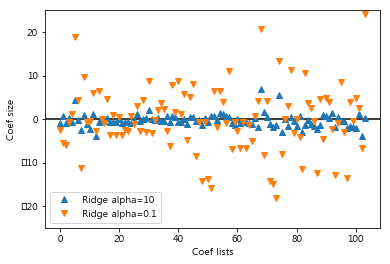

In [14]:
## 분석
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.xlabel("Coef lists")
plt.ylabel("Coef size")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend();

### 라쏘(Lasso)
L1 규제를 사용하여 규제(regularization)를 한다.

In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수 : {}".format(np.sum(lasso.coef_ !=0)))
print("lasso.coef_(w) : {}".format(lasso.coef_))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수 : 4
lasso.coef_(w) : [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.         -0.         -0

In [16]:
from sklearn.linear_model import Lasso
lasso01 = Lasso(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso01.score(X_test, y_test)))
print("사용한 특성의 개수 : {}".format(np.sum(lasso01.coef_ !=0)))
print("lasso.coef_(w) : {}".format(lasso01.coef_))

훈련 세트 점수: 0.77
테스트 세트 점수: 0.63
사용한 특성의 개수 : 8
lasso.coef_(w) : [ -0.           0.          -0.           0.          -0.
   0.          -0.          -0.          -0.          -0.
  -6.94791033   0.         -15.73526712  -0.           0.
  -0.           0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.           0.          -0.           0.           0.
   0.           0.          -0.           0.          -0.
  -0.           0.          -0.          -0.           0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.           0.
   0.           0.           0.           0.           0.
   0.           0.           1.57250048   0.          -0.06794425
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          19.43341184  -0.
  -0.          -0.          -5.13377204  -0.           5.34522643
  -0.          -0.          -0.          -0.       

In [17]:
from sklearn.linear_model import Lasso
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수 : {}".format(np.sum(lasso001.coef_ !=0)))
print("lasso.coef_(w) : {}".format(lasso001.coef_))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수 : 33
lasso.coef_(w) : [ -0.          -0.          -0.           0.          -0.
   0.          -0.          -1.30683918  10.94664016   0.
   0.           0.          -0.31532732  -0.          -0.
  -0.           0.          -0.          -0.          -0.
  -0.          -8.91227147  -0.          -0.          -0.
  -0.           2.09533733  -0.           0.          -0.
   0.          -0.           0.           0.          -0.
   0.          -0.          -0.           0.           0.
   0.          -0.           0.          -4.08249984   0.
   6.66787706  -0.          -0.          -0.           0.
  -4.40104807  -2.10548411   3.77595291  -0.           4.38381849
   0.           0.           0.18662246  -0.          -1.17594281
  -4.29006257  -0.          -0.          -2.2160665   -0.
  -1.8820987   -0.          -0.          29.74050877  -2.08168251
   0.         -12.00134952 -11.14786769 -11.66008855  13.11691565
 -11.15372311  -0.          -0.   

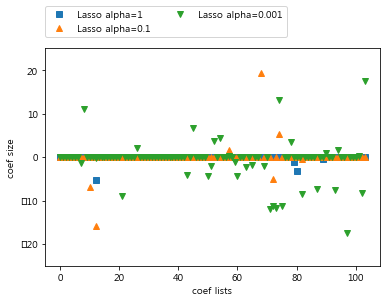

In [18]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso01.coef_, '^', label="Lasso alpha=0.1")
plt.plot(lasso001.coef_, 'v', label="Lasso alpha=0.001")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("coef lists")
plt.ylabel("coef size");

|구분|릿지회귀|라쏘회귀|
|:-------:|:--------:|:--------:|
|제약식|L2 norm|L1 norm|
|변수선택|불가능|가능|
|장점|변수간 상관관계가 높아도 좋은 성능|변수간 상관관계가 높으면 성능이 떨어짐|
|특징|크기가 큰 변수를 우선적으로 줄임|비중요 변수를 우선적으로 줄임|